<a href="https://colab.research.google.com/github/AasimJadaf/CGPA-Calculator-with-Graphs-Project/blob/main/LemonLeafDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

In [ ]:
data_dir = "/content/drive/MyDrive/Lemonproject/Training"

In [ ]:
img_size = (128, 128)
batch_size = 32

In [ ]:
# Load dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 1404 files belonging to 9 classes.
Using 1124 files for training.
Found 1404 files belonging to 9 classes.
Using 280 files for validation.


In [ ]:
import tensorflow as tf
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os

# Define dataset path
data_dir = "/content/drive/MyDrive/Lemonproject/Training"

# Image parameters
img_size = (128, 128)
batch_size = 32

# Load dataset
train_ds_raw = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

val_ds_raw = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Get class names before preprocessing
class_names = train_ds_raw.class_names
num_classes = len(class_names)

Found 1404 files belonging to 9 classes.
Using 1124 files for training.
Found 1404 files belonging to 9 classes.
Using 280 files for validation.


In [ ]:
# Normalize pixel values
normalization_layer = layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

In [ ]:
# Define CNN model
model = keras.Sequential([
    layers.Input(shape=(128, 128, 3)),  # Explicit Input layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Using retrieved num_classes
])

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train model1
epochs = 10
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 419s 12s/step - accuracy: 0.2199 - loss: 2.1118 - val_accuracy: 0.4179 - val_loss: 1.5249
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5193 - loss: 1.3670 - val_accuracy: 0.7464 - val_loss: 0.8725
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.6607 - loss: 1.0400 - val_accuracy: 0.7679 - val_loss: 0.7734
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.6807 - loss: 0.9048 - val_accuracy: 0.7893 - val_loss: 0.6507
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7229 - loss: 0.8238 - val_accuracy: 0.8143 - val_loss: 0.5865
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7562 - loss: 0.7417 - val_accuracy: 0.8000 - val_loss: 0.6193
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.7424 - loss: 0.7542 - val_accuracy: 0.8286 - val_loss: 0.4910
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.8314 - loss: 0.5215 - val_accuracy: 0.8357 - val_los

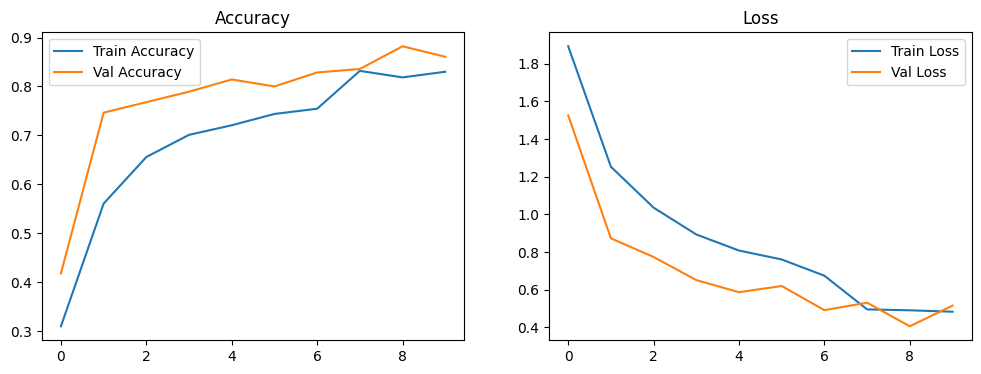

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Save model
model.save("/kaggle/working/lemon_leaf_cnn_model.h5")

In [ ]:
test_set=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=False,
    image_size=img_size,
    batch_size=batch_size
)

Found 1404 files belonging to 9 classes.
Using 1124 files for training.


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [ ]:
# Load the trained model
model = tf.keras.models.load_model("/kaggle/working/lemon_leaf_cnn_model.h5")

In [ ]:
def preprocess_image(img_path, img_size=(128, 128)):
    img = image.load_img(img_path, target_size=img_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize
    return img_array

In [ ]:
def predict_image(img_path, class_names):
    img_array = preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction)

    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Prediction: {class_names[predicted_class]} (Confidence: {confidence:.2f})")
    plt.show()
    return class_names[predicted_class], confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


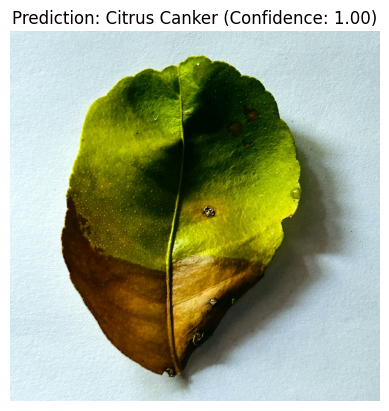

Predicted Class: Citrus Canker, Confidence: 1.00


In [ ]:
class_names = ['Anthracnose', 'Bacterial Blight', 'Citrus Canker','Curl Virus','Deficiency Leaf',' Dry Leaf','Healthy Leaf','Sooty Mould','Spider Mites' ]
image_path = "/content/drive/MyDrive/Lemonproject/Training/Citrus Canker/Citrus_Canker00001.JPG"  # Replace with actual image path
predicted_label, conf = predict_image(image_path, class_names)
print(f"Predicted Class: {predicted_label}, Confidence: {conf:.2f}")

In [ ]:
import os

test_images_dir = "/content/drive/MyDrive/Lemonproject/Training"
if not os.path.isdir(test_images_dir):
    raise FileNotFoundError(f"Directory not found: {test_images_dir}")


In [ ]:
files = os.listdir(test_images_dir)
print("Files in directory:", files)


Files in directory: ['Deficiency Leaf', 'Citrus Canker', 'Healthy Leaf', 'Curl Virus', 'Sooty Mould', 'Dry Leaf', 'Bacterial Blight', 'Spider Mites', 'Anthracnose']


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 866ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


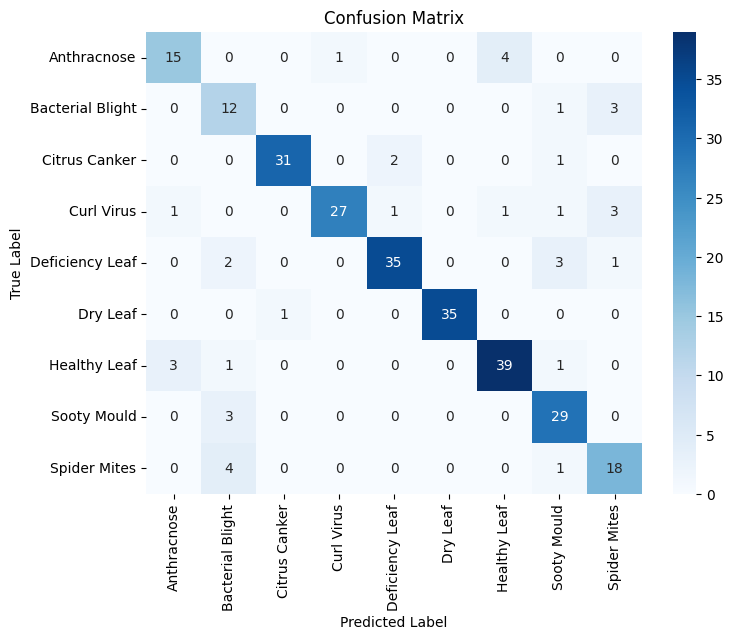

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Step 1: Get the true labels and predictions
y_true = []
y_pred = []

# Go through the validation dataset
for images, labels in val_ds:
    preds = model.predict(images)
    predicted_labels = np.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# Step 2: Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = val_ds_raw.class_names
 # Get class names from dataset

# Step 3: Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Make sure y_true and y_pred are already available (from previous confusion matrix code)
# If not, re-run the prediction loop:
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    predicted_labels = np.argmax(preds, axis=1)

    y_true.extend(labels.numpy())
    y_pred.extend(predicted_labels)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"✅ Model Accuracy on Validation Set: {accuracy * 100:.2f}%")



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 703ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
✅ Model Accuracy on Validation Set: 86.07%
